In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:

## SAME PARAMETER ##
beta = 0.33 # Tansmission rate
gamma = 0.14 # Recovery rate
nu = 0.01  # vaccine rate
b = 0.01           # Breakthrough rate (fraction of immune who become susceptible again)

N = 5_826_529  #Total Population
I0 = 500              # Start Infection
R0_init = 0 #Start recovering from disease
V0 = 0 #Start vaccinated
S0 = N - I0 - R0_init - V0 #Start susceptible


T = 365 #Daily Time Steps
dt = 1 # Simulation updates daily

# Arrays to store results
S = np.zeros(T+1, dtype=int)
I = np.zeros(T+1, dtype=int)
R = np.zeros(T+1, dtype=int)
V = np.zeros(T+1, dtype=int)

# Set initial values
S[0] = S0
I[0] = I0
R[0] = R0_init
V[0] = V0

In [14]:
# Simulation loop
for t in range(T):
    # Transition probabilities
    p_infect = 1 - np.exp(-beta * I[t] / N * dt)
    p_recover = 1 - np.exp(-gamma * dt)
    p_vacc = 1 - np.exp(-nu * dt)

    # Events
    new_infect = np.random.binomial(S[t], p_infect)
    new_recover = np.random.binomial(I[t], p_recover)
    new_vacc = np.random.binomial(S[t] - new_infect, p_vacc)

    # Breakthroughs from R and V back to S
    breakthrough_R = np.random.binomial(R[t], b)
    breakthrough_V = np.random.binomial(V[t], b)

    # Update compartmentshuhhn
    S[t+1] = S[t] - new_infect - new_vacc + breakthrough_R + breakthrough_V
    I[t+1] = I[t] + new_infect - new_recover
    R[t+1] = R[t] + (1 - b) * new_recover - breakthrough_R
    V[t+1] = V[t] + (1 - b) * new_vacc - breakthrough_V

    # Ensure values remain non-negative
    S[t+1] = max(0, S[t+1])
    I[t+1] = max(0, I[t+1])
    R[t+1] = max(0, int(R[t+1]))
    V[t+1] = max(0, int(V[t+1]))

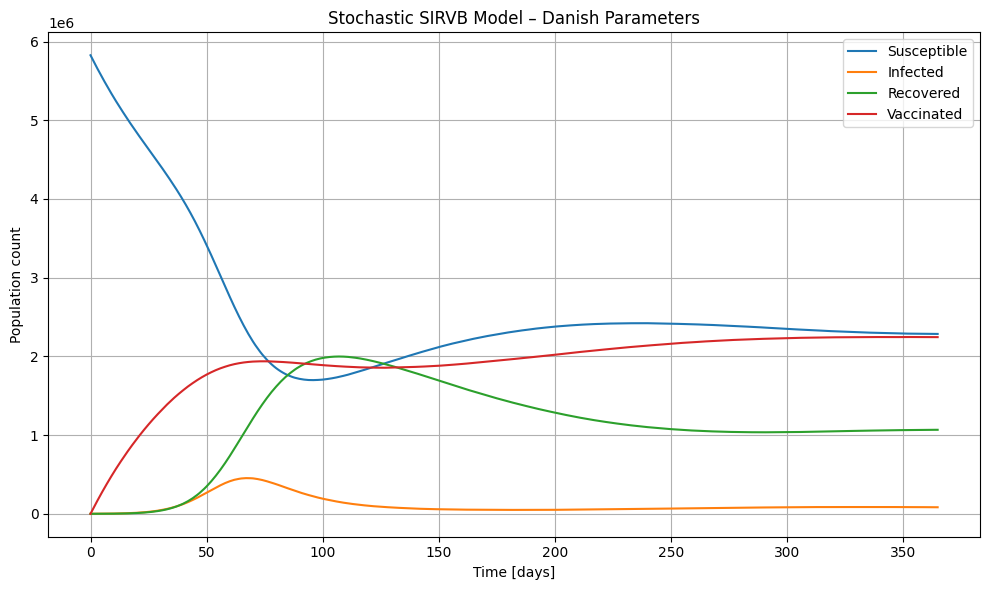

In [ ]:
# Plot
plt.figure(figsize=(10, 6))
plt.plot(S, label='Susceptible')
plt.plot(I, label='Infected')
plt.plot(R, label='Recovered')
plt.plot(V, label='Vaccinated')
plt.xlabel('Time [days]')
plt.ylabel('Population count')
plt.title('Stochastic SIRVB Model – Danish Parameters')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('stochastic_sirvb_dk.pdf')
plt.show()